# Dataset 2

## https://archive.ics.uci.edu/dataset/489/parkinson+dataset+with+replicated+acoustic+features

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('../Dataframes/dataset2.csv')
data.head()

,ID,Recording,Status,Gender,Jitter_rel,Jitter_abs,Jitter_RAP,Jitter_PPQ,Shim_loc,Shim_dB,...,Delta3,Delta4,Delta5,Delta6,Delta7,Delta8,Delta9,Delta10,Delta11,Delta12
0,CONT-01,1,0,1,0.25546,0.000015,0.001467,0.001673,0.030256,0.26313,...,1.407701,1.417218,1.380352,1.420670,1.451240,1.440295,1.403678,1.405495,1.416705,1.354610
1,CONT-01,2,0,1,0.36964,0.000022,0.001932,0.002245,0.023146,0.20217,...,1.331232,1.227338,1.213377,1.352739,1.354242,1.365692,1.322870,1.314549,1.318999,1.323508
2,CONT-01,3,0,1,0.23514,0.000013,0.001353,0.001546,0.019338,0.16710,...,1.412304,1.324674,1.276088,1.429634,1.455996,1.368882,1.438053,1.388910,1.305469,1.305402
3,CONT-02,1,0,0,0.29320,0.000017,0.001105,0.001444,0.024716,0.20892,...,1.501200,1.534170,1.323993,1.496442,1.472926,1.643177,1.551286,1.638346,1.604008,1.621456
4,CONT-02,2,0,0,0.23075,0.000015,0.001073,0.001404,0.013119,0.11607,...,1.508468,1.334511,1.610694,1.685021,1.417614,1.574895,1.640088,1.533666,1.297536,1.382023


In [3]:
data.shape

(240, 48)

[]

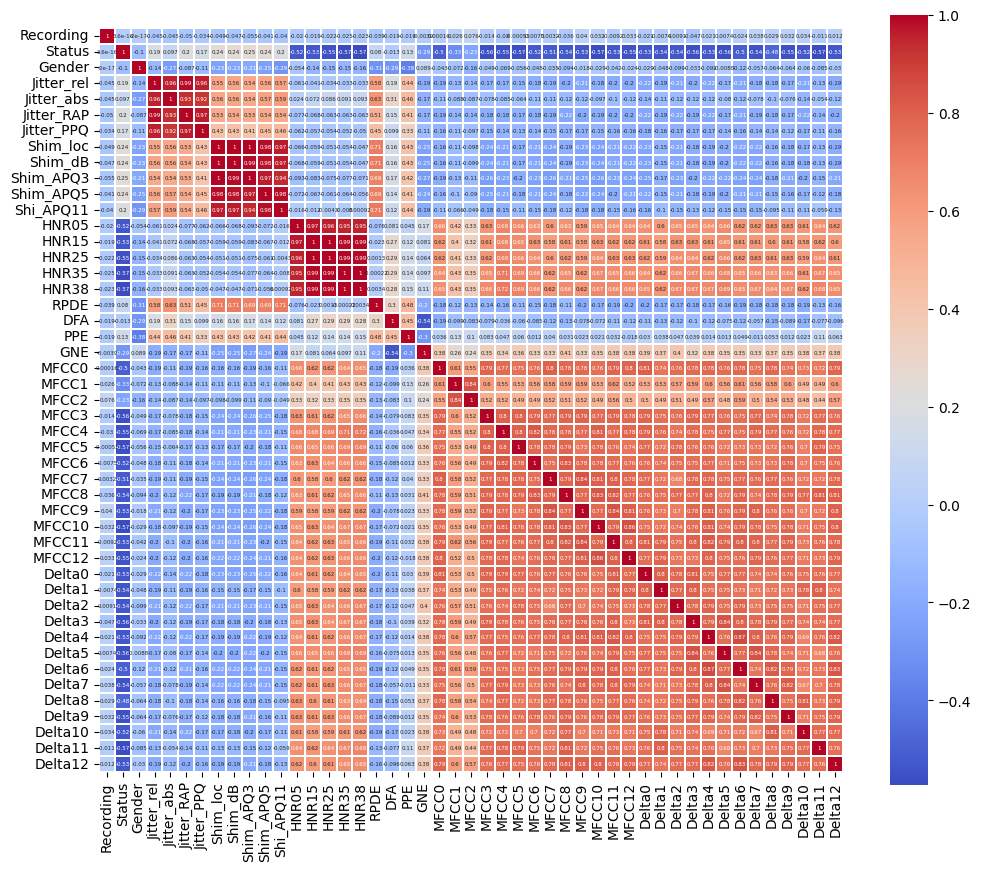

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = data.select_dtypes(include = 'number').corr()

plt.figure(figsize=(12, 10))

sns.heatmap(corr_matrix, cmap = 'coolwarm', square=True, linewidths=0.2, annot=True, annot_kws={"size": 4})
plt.plot()

## XGBoost

In [4]:
import pandas as pd
import numpy as np

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [5]:
data2 = data.copy()
data2 = data2.drop(['ID'], axis = 1)

In [6]:
X = data2.drop(['Status'], axis = 1)
y = data2['Status']

X_train, X_test, y_train, y_test1 = train_test_split(X, y, test_size = 0.2, random_state = 45)

XGB_classifier = XGBClassifier(random_state=45)

XGB_classifier.fit(X_train, y_train)

y_pred1 = XGB_classifier.predict(X_test)

accuracy = accuracy_score(y_test1, y_pred1)
print(f'Accuracy of the XGBoost Classifier: {accuracy:.2f}')

Accuracy of the XGBoost Classifier: 0.75


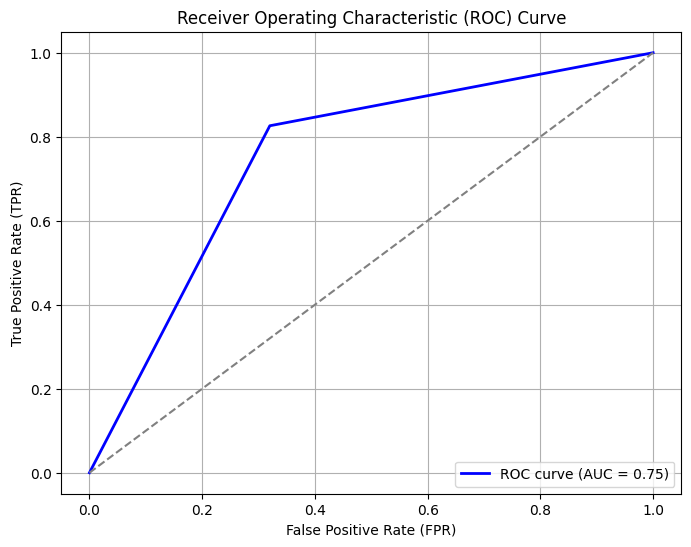

In [7]:
fpr, tpr, thresholds = roc_curve(y_test1, y_pred1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


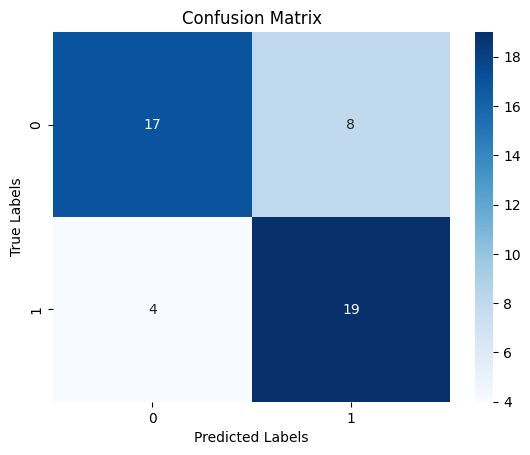

Confusion Matrix:
 [[17  8]
 [ 4 19]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.68      0.74        25
           1       0.70      0.83      0.76        23

    accuracy                           0.75        48
   macro avg       0.76      0.75      0.75        48
weighted avg       0.76      0.75      0.75        48



In [8]:
conf_matrix = confusion_matrix(y_test1, y_pred1)


sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print the confusion matrix
print("Confusion Matrix:\n", conf_matrix)

# Print the classification report
class_report = classification_report(y_test1, y_pred1)
print("Classification Report:\n", class_report)

<Figure size 3000x3000 with 0 Axes>

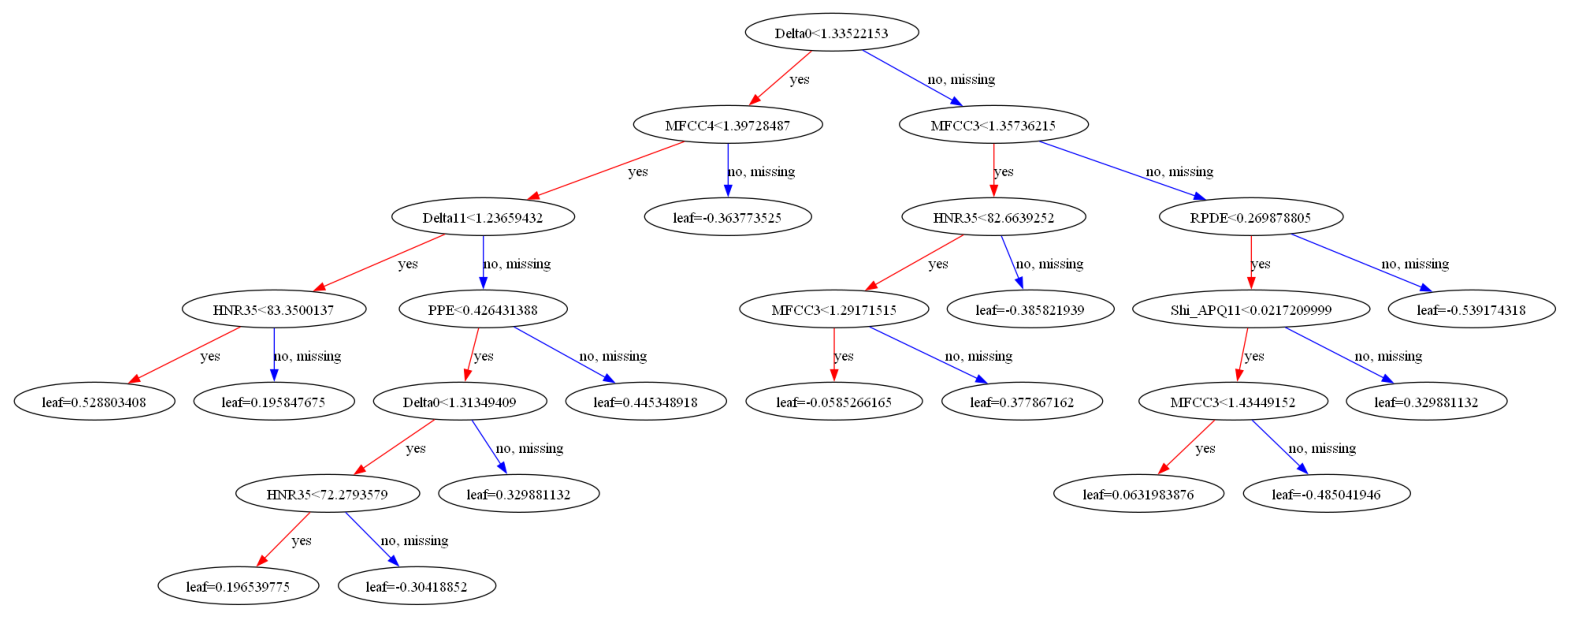

In [44]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import xgboost as xgb

plt.figure(figsize=(30, 30))
xgb.plot_tree(XGB_classifier)

fig = plt.gcf()
fig.set_size_inches(20, 15)

plt.show()

## Support Vector Machine

In [9]:
import pandas as pd
import numpy as np

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [10]:
data2 = data.copy()
data2 = data2.drop(['ID'], axis = 1)

### Linear

In [11]:
X = data2.drop(['Status'], axis = 1)
y = data2['Status']

X_train, X_test, y_train, y_test21 = train_test_split(X, y, test_size = 0.2, random_state = 45)

SVM_classifier = SVC(random_state=45, kernel = 'linear')

SVM_classifier.fit(X_train, y_train)

y_pred21 = SVM_classifier.predict(X_test)

accuracy = accuracy_score(y_test21, y_pred21)
print(f'Accuracy of the SVM Classifier: {accuracy:.2f}')


Accuracy of the SVM Classifier: 0.75


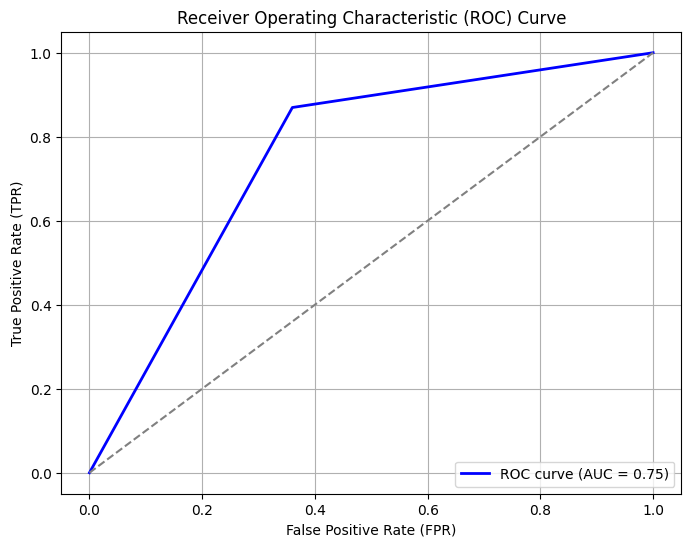

In [12]:
fpr, tpr, thresholds = roc_curve(y_test21, y_pred21)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


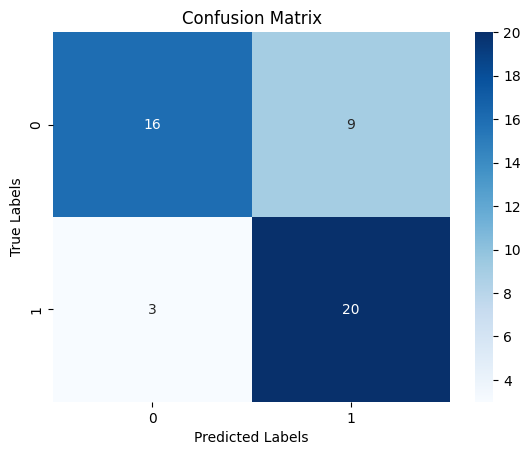

Confusion Matrix:
 [[16  9]
 [ 3 20]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.64      0.73        25
           1       0.69      0.87      0.77        23

    accuracy                           0.75        48
   macro avg       0.77      0.75      0.75        48
weighted avg       0.77      0.75      0.75        48



In [13]:
conf_matrix = confusion_matrix(y_test21, y_pred21)


sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print the confusion matrix
print("Confusion Matrix:\n", conf_matrix)

# Print the classification report
class_report = classification_report(y_test21, y_pred21)
print("Classification Report:\n", class_report)

### Polynomial

In [14]:
X = data2.drop(['Status'], axis = 1)
y = data2['Status']
X_train, X_test, y_train, y_test22 = train_test_split(X, y, test_size = 0.2, random_state = 45)

SVM_classifier = SVC(random_state=45, kernel = 'poly')

SVM_classifier.fit(X_train, y_train)

y_pred22 = SVM_classifier.predict(X_test)

accuracy = accuracy_score(y_test22, y_pred22)
print(f'Accuracy of the SVM Classifier: {accuracy:.2f}')


Accuracy of the SVM Classifier: 0.75


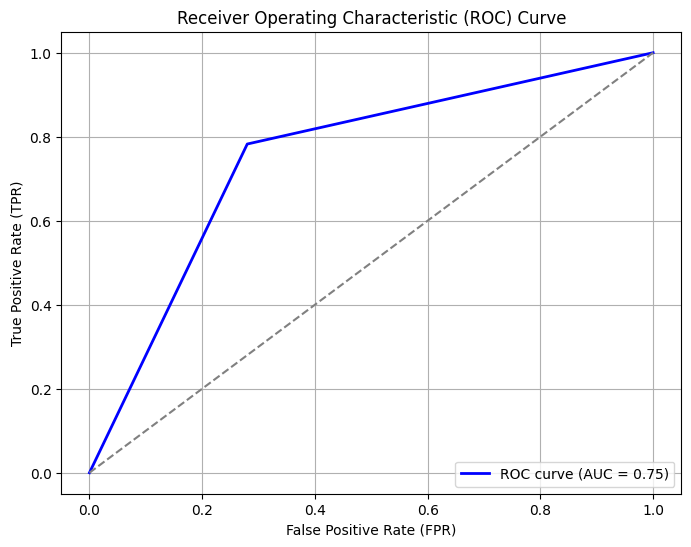

In [15]:
fpr, tpr, thresholds = roc_curve(y_test22, y_pred22)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


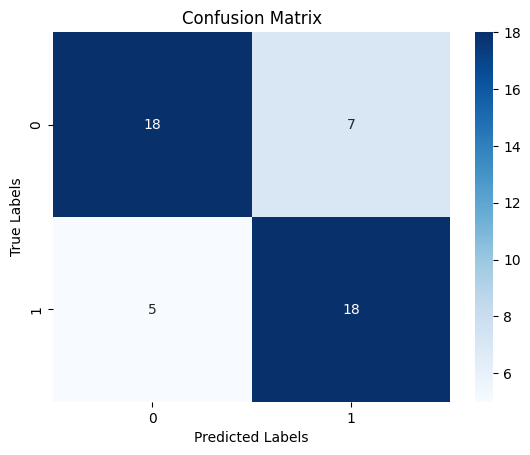

Confusion Matrix:
 [[18  7]
 [ 5 18]]
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.72      0.75        25
           1       0.72      0.78      0.75        23

    accuracy                           0.75        48
   macro avg       0.75      0.75      0.75        48
weighted avg       0.75      0.75      0.75        48



In [16]:
conf_matrix = confusion_matrix(y_test22, y_pred22)


sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print the confusion matrix
print("Confusion Matrix:\n", conf_matrix)

# Print the classification report
class_report = classification_report(y_test22, y_pred22)
print("Classification Report:\n", class_report)

### Radial Basis Function

In [17]:
X = data2.drop(['Status'], axis = 1)
y = data2['Status']
X_train, X_test, y_train, y_test23 = train_test_split(X, y, test_size = 0.2, random_state = 45)

SVM_classifier = SVC(random_state=45, kernel = 'rbf')

SVM_classifier.fit(X_train, y_train)

y_pred23 = SVM_classifier.predict(X_test)

accuracy = accuracy_score(y_test23, y_pred23)
print(f'Accuracy of the SVM Classifier: {accuracy:.2f}')


Accuracy of the SVM Classifier: 0.79


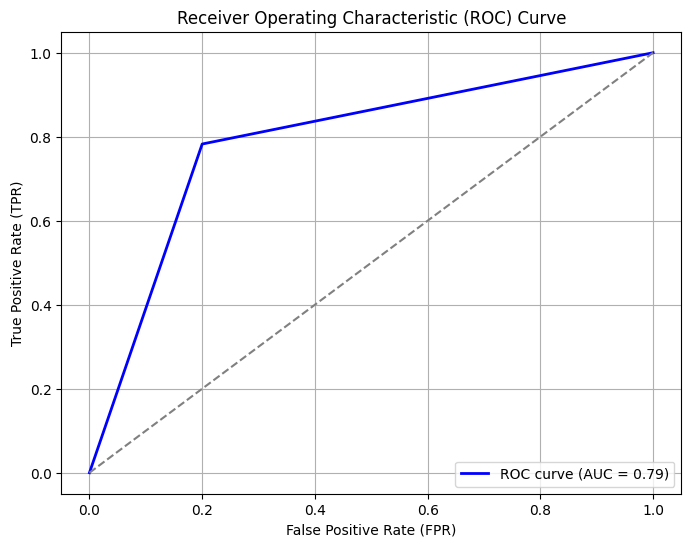

In [18]:
fpr, tpr, thresholds = roc_curve(y_test23, y_pred23)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

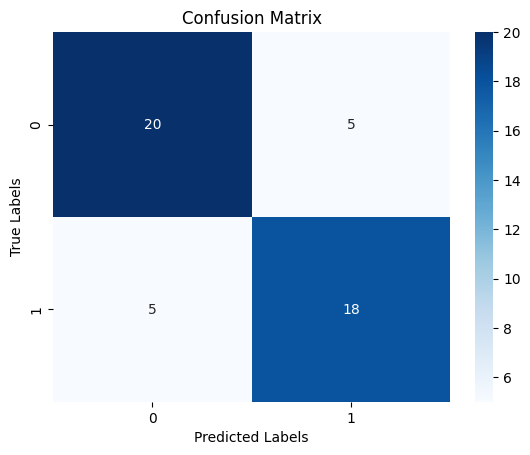

Confusion Matrix:
 [[20  5]
 [ 5 18]]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80        25
           1       0.78      0.78      0.78        23

    accuracy                           0.79        48
   macro avg       0.79      0.79      0.79        48
weighted avg       0.79      0.79      0.79        48



In [19]:
conf_matrix = confusion_matrix(y_test23, y_pred23)


sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print the confusion matrix
print("Confusion Matrix:\n", conf_matrix)

# Print the classification report
class_report = classification_report(y_test23, y_pred23)
print("Classification Report:\n", class_report)

### Sigmoid Kernel

In [20]:
X = data2.drop(['Status'], axis = 1)
y = data2['Status']
X_train, X_test, y_train, y_test24 = train_test_split(X, y, test_size = 0.2, random_state = 45)

SVM_classifier = SVC(random_state=45, kernel = 'sigmoid')

SVM_classifier.fit(X_train, y_train)

y_pred24 = SVM_classifier.predict(X_test)

accuracy = accuracy_score(y_test24, y_pred24)
print(f'Accuracy of the SVM Classifier: {accuracy:.2f}')


Accuracy of the SVM Classifier: 0.27


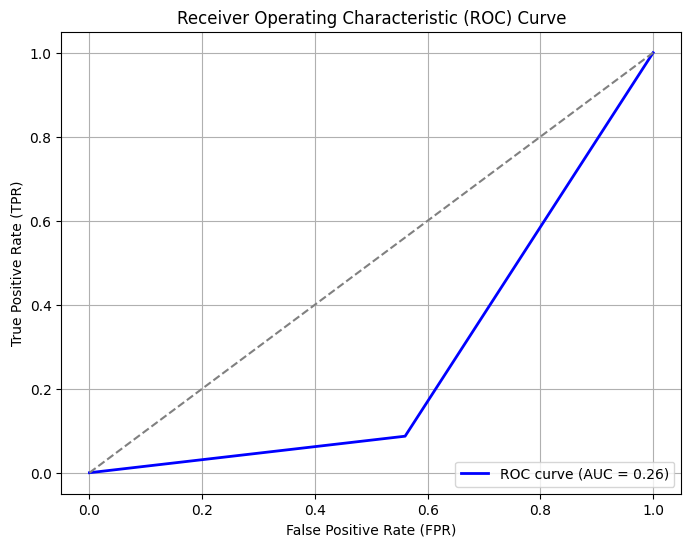

In [21]:
fpr, tpr, thresholds = roc_curve(y_test24, y_pred24)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


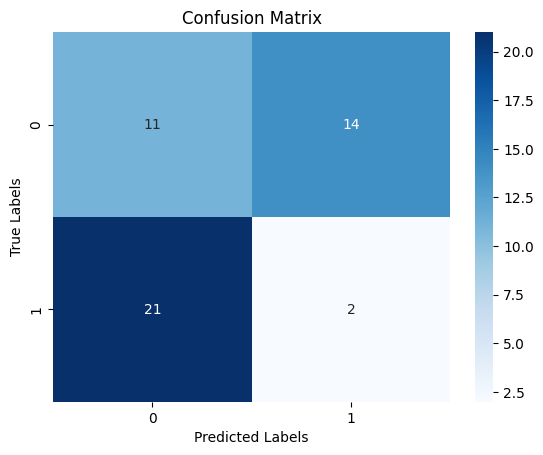

Confusion Matrix:
 [[11 14]
 [21  2]]
Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.44      0.39        25
           1       0.12      0.09      0.10        23

    accuracy                           0.27        48
   macro avg       0.23      0.26      0.24        48
weighted avg       0.24      0.27      0.25        48



In [22]:
conf_matrix = confusion_matrix(y_test24, y_pred24)


sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print the confusion matrix
print("Confusion Matrix:\n", conf_matrix)

# Print the classification report
class_report = classification_report(y_test24, y_pred24)
print("Classification Report:\n", class_report)

## Random Forest

In [23]:
import pandas as pd
import numpy as np

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [24]:
data2 = data.copy()
data2 = data2.drop(['ID'], axis = 1)

### GINI Index

In [25]:
X = data2.drop(['Status'], axis = 1)
y = data2['Status']

X_train, X_test, y_train, y_test31 = train_test_split(X, y, test_size = 0.2, random_state = 45)

RF_Classifier = RandomForestClassifier(n_estimators = 100, random_state = 45, criterion='gini')

RF_Classifier.fit(X_train, y_train)

y_pred31 = RF_Classifier.predict(X_test)

accuracy = accuracy_score(y_test31, y_pred31)
print(f'Accuracy of the Random Forest Classifier: {accuracy:.2f}')

Accuracy of the Random Forest Classifier: 0.79


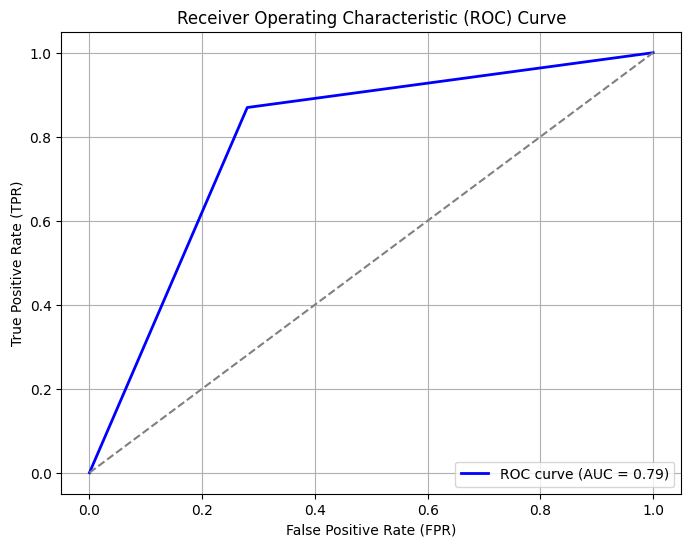

In [26]:
fpr, tpr, thresholds = roc_curve(y_test31, y_pred31)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


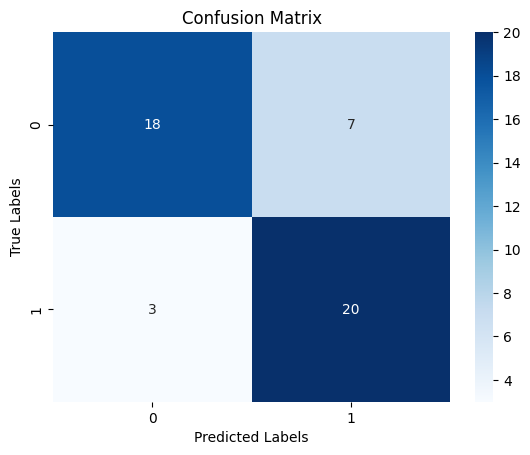

Confusion Matrix:
 [[18  7]
 [ 3 20]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.72      0.78        25
           1       0.74      0.87      0.80        23

    accuracy                           0.79        48
   macro avg       0.80      0.79      0.79        48
weighted avg       0.80      0.79      0.79        48



In [27]:
conf_matrix = confusion_matrix(y_test31, y_pred31)


sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print the confusion matrix
print("Confusion Matrix:\n", conf_matrix)

# Print the classification report
class_report = classification_report(y_test31, y_pred31)
print("Classification Report:\n", class_report)

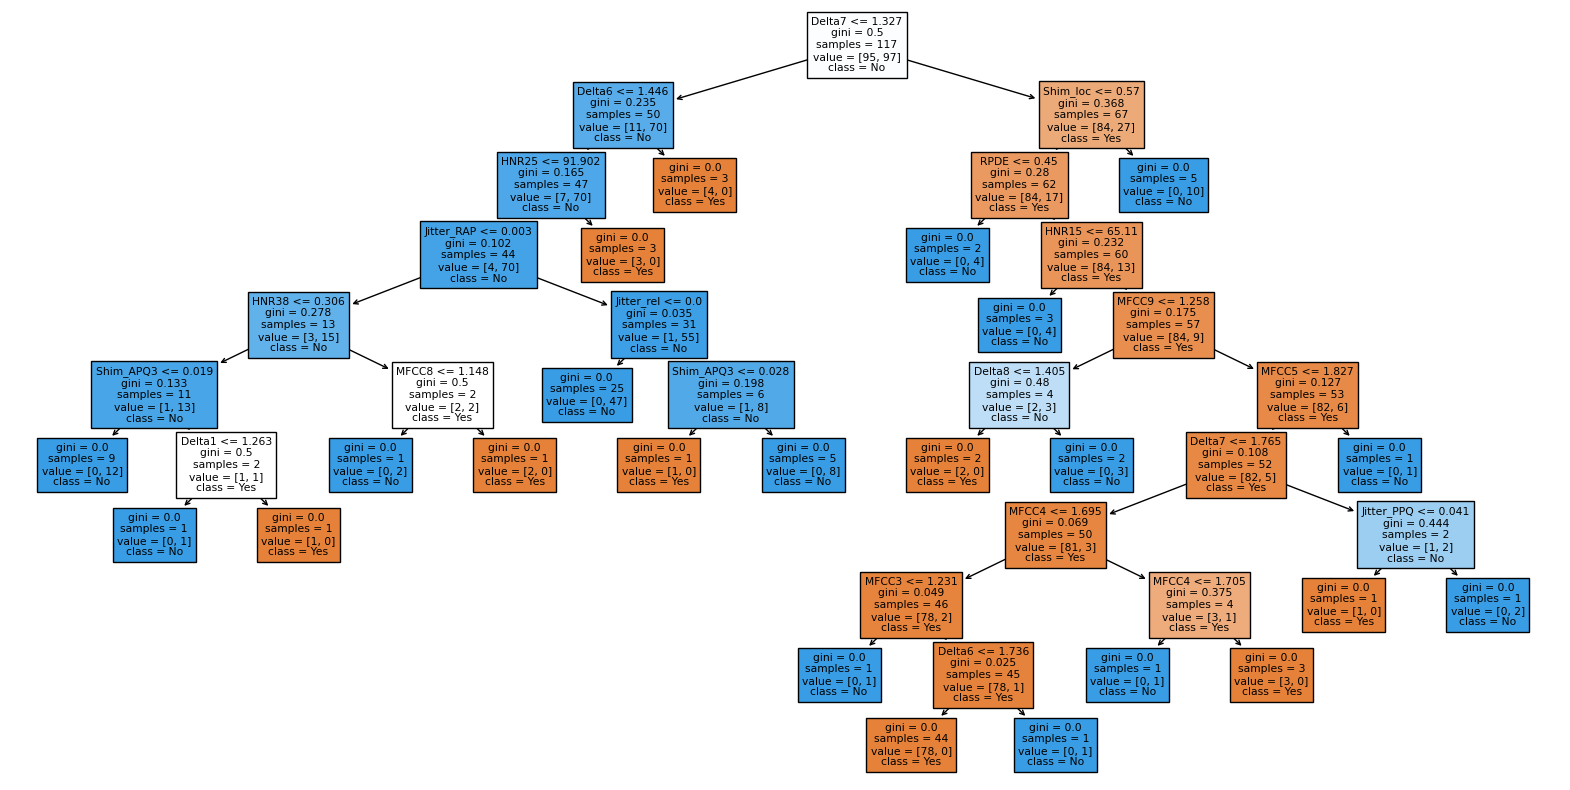

In [28]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(RF_Classifier.estimators_[0], feature_names = data2.columns, class_names = ['Yes', 'No'], filled = True)
plt.show()

### Entropy

In [29]:
X = data2.drop(['Status'], axis = 1)
y = data2['Status']
X_train, X_test, y_train, y_test32 = train_test_split(X, y, test_size = 0.2, random_state = 45)

RF_Classifier = RandomForestClassifier(n_estimators = 100, random_state = 45, criterion='entropy')

RF_Classifier.fit(X_train, y_train)

y_pred32 = RF_Classifier.predict(X_test)

accuracy = accuracy_score(y_test32, y_pred32)
print(f'Accuracy of the Random Forest Classifier: {accuracy:.2f}')

Accuracy of the Random Forest Classifier: 0.79


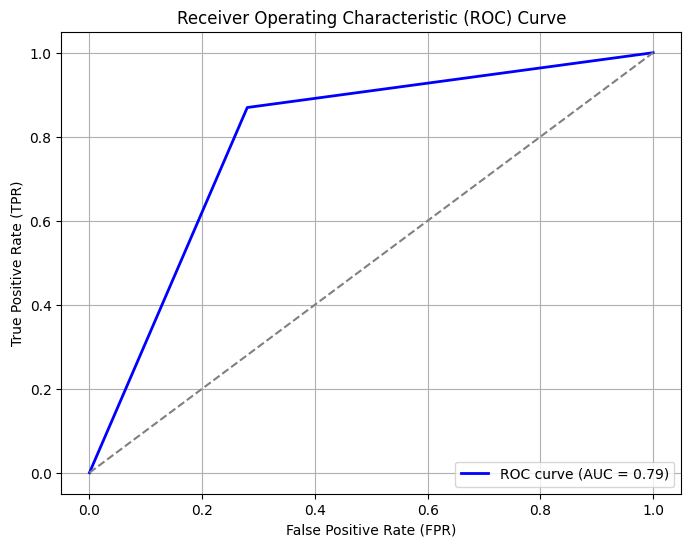

In [30]:
fpr, tpr, thresholds = roc_curve(y_test32, y_pred32)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


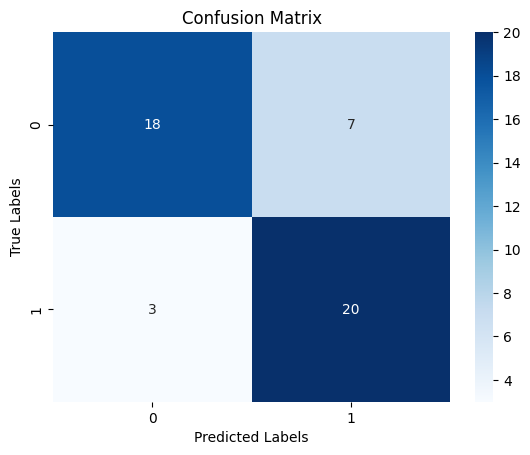

Confusion Matrix:
 [[18  7]
 [ 3 20]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.72      0.78        25
           1       0.74      0.87      0.80        23

    accuracy                           0.79        48
   macro avg       0.80      0.79      0.79        48
weighted avg       0.80      0.79      0.79        48



In [31]:
conf_matrix = confusion_matrix(y_test32, y_pred32)


sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print the confusion matrix
print("Confusion Matrix:\n", conf_matrix)

# Print the classification report
class_report = classification_report(y_test32, y_pred32)
print("Classification Report:\n", class_report)

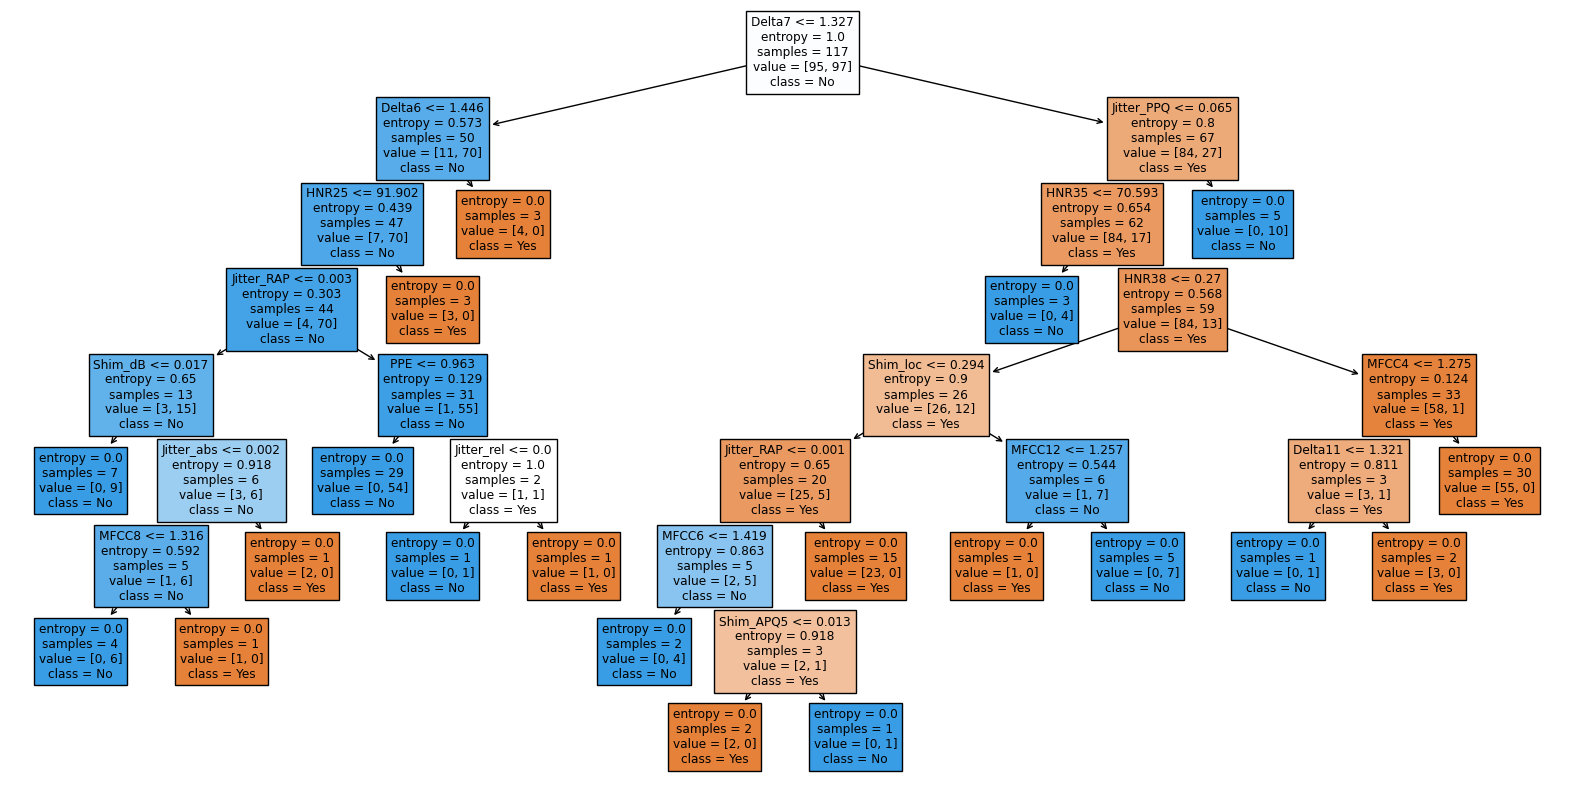

In [32]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(RF_Classifier.estimators_[0], feature_names = data2.columns, class_names = ['Yes', 'No'], filled = True)
plt.show()

## Naive Bayes

In [33]:
import pandas as pd
import numpy as np

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [34]:
data2 = data.copy()
data2 = data2.drop(['ID'], axis = 1)

In [35]:
X = data2.drop(['Status'], axis = 1)
y = data2['Status']

scaler = StandardScaler()

X_train, X_test, y_train, y_test4 = train_test_split(X, y, test_size = 0.2, random_state = 45)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Naive_Bayes_classifier = GaussianNB()

Naive_Bayes_classifier.fit(X_train, y_train)

y_pred4 = Naive_Bayes_classifier.predict(X_test)

accuracy = accuracy_score(y_test4, y_pred4)
print(f'Accuracy of the XGBoost Classifier: {accuracy:.2f}')

Accuracy of the XGBoost Classifier: 0.81


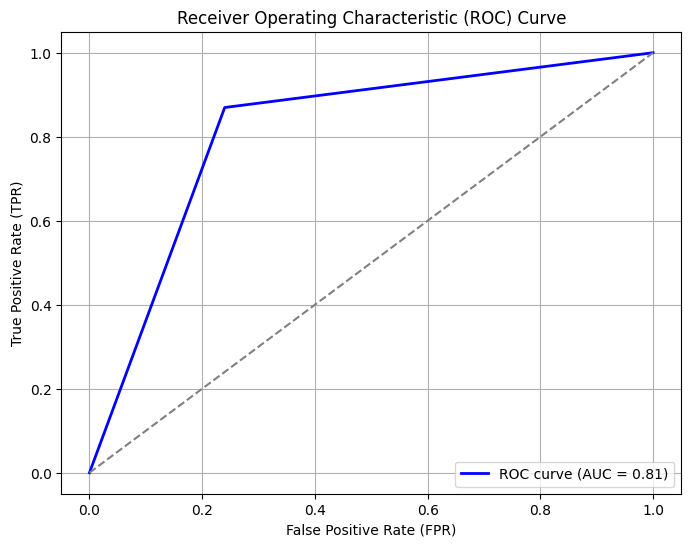

In [36]:
fpr, tpr, thresholds = roc_curve(y_test4, y_pred4)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


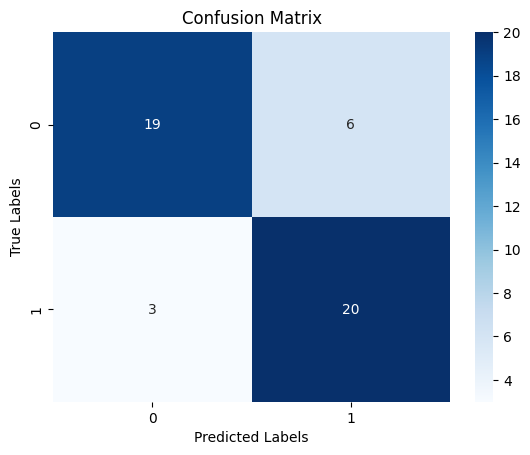

Confusion Matrix:
 [[19  6]
 [ 3 20]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.76      0.81        25
           1       0.77      0.87      0.82        23

    accuracy                           0.81        48
   macro avg       0.82      0.81      0.81        48
weighted avg       0.82      0.81      0.81        48



In [37]:
conf_matrix = confusion_matrix(y_test4, y_pred4)


sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print the confusion matrix
print("Confusion Matrix:\n", conf_matrix)

# Print the classification report
class_report = classification_report(y_test4, y_pred4)
print("Classification Report:\n", class_report)

## KNN

In [38]:
import pandas as pd
import numpy as np

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [39]:
data2 = data.copy()
data2 = data2.drop(['ID'], axis = 1)

In [40]:
X = data2.drop(['Status'], axis = 1)
y = data2['Status']

scaler = StandardScaler()

X_train, X_test, y_train, y_test5 = train_test_split(X, y, test_size = 0.2, random_state = 45)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_classifier = KNeighborsClassifier(n_neighbors=3)

knn_classifier.fit(X_train_scaled, y_train)

y_pred5 = knn_classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_test5, y_pred5)
print(f'Accuracy of the KNN Classifier: {accuracy:.2f}')

Accuracy of the KNN Classifier: 0.81


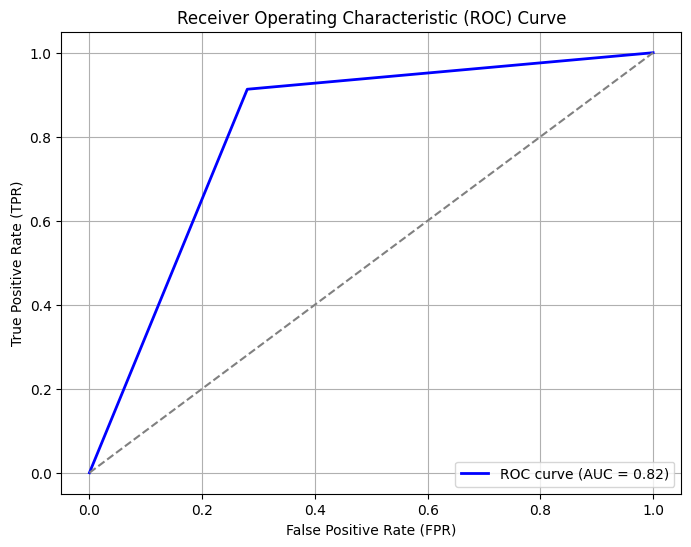

In [41]:
fpr, tpr, thresholds = roc_curve(y_test5, y_pred5)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


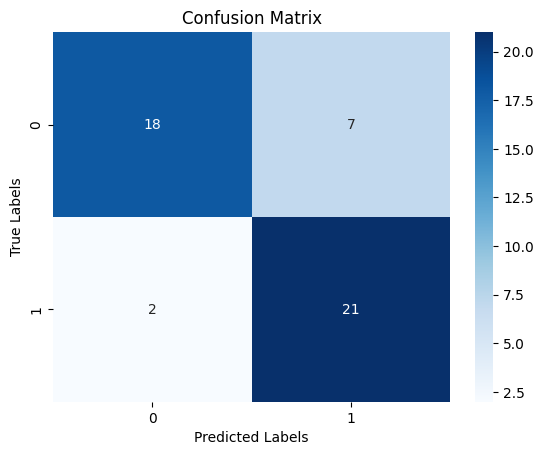

Confusion Matrix:
 [[18  7]
 [ 2 21]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.72      0.80        25
           1       0.75      0.91      0.82        23

    accuracy                           0.81        48
   macro avg       0.82      0.82      0.81        48
weighted avg       0.83      0.81      0.81        48



In [42]:
conf_matrix = confusion_matrix(y_test5, y_pred5)


sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print the confusion matrix
print("Confusion Matrix:\n", conf_matrix)

# Print the classification report
class_report = classification_report(y_test5, y_pred5)
print("Classification Report:\n", class_report)

# Combined analaysis

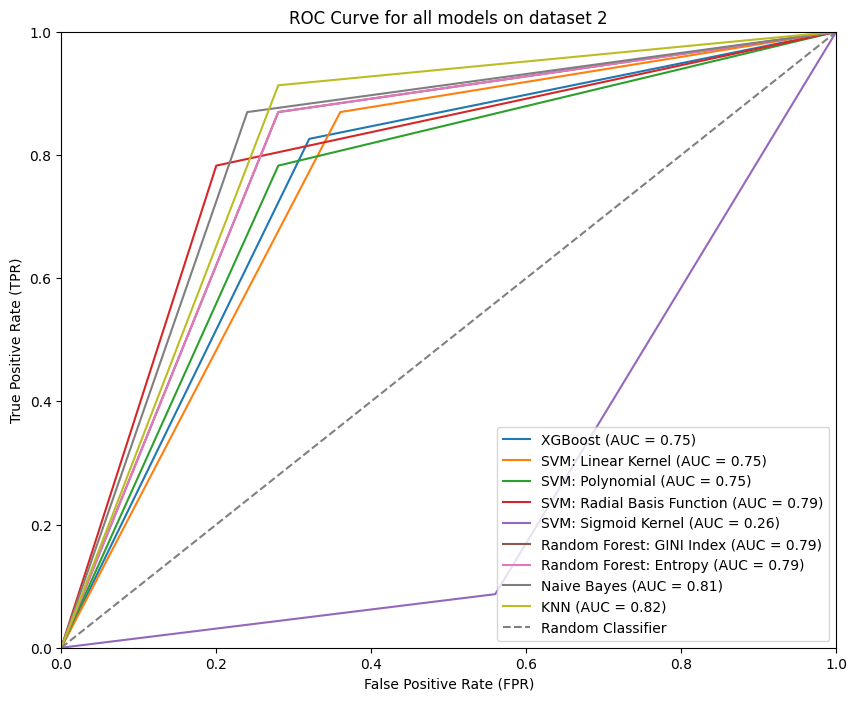

In [43]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr1, tpr1, _ = roc_curve(y_test1, y_pred1)
roc_auc1 = auc(fpr1, tpr1)

fpr21, tpr21, _ = roc_curve(y_test21, y_pred21)
roc_auc21 = auc(fpr21, tpr21)

fpr22, tpr22, _ = roc_curve(y_test22, y_pred22)
roc_auc22 = auc(fpr22, tpr22)

fpr23, tpr23, _ = roc_curve(y_test23, y_pred23)
roc_auc23 = auc(fpr23, tpr23)

fpr24, tpr24, _ = roc_curve(y_test24, y_pred24)
roc_auc24 = auc(fpr24, tpr24)

fpr31, tpr31, _ = roc_curve(y_test31, y_pred31)
roc_auc31 = auc(fpr31, tpr31)

fpr32, tpr32, _ = roc_curve(y_test32, y_pred32)
roc_auc32 = auc(fpr32, tpr32)

fpr4, tpr4, _ = roc_curve(y_test4, y_pred4)
roc_auc4 = auc(fpr4, tpr4)

fpr5, tpr5, _ = roc_curve(y_test5, y_pred5)
roc_auc5 = auc(fpr5, tpr5)

plt.figure(figsize=(10, 8))
plt.plot(fpr1, tpr1, label=f'XGBoost (AUC = {roc_auc1:.2f})')
plt.plot(fpr21, tpr21, label=f'SVM: Linear Kernel (AUC = {roc_auc21:.2f})')
plt.plot(fpr22, tpr22, label=f'SVM: Polynomial (AUC = {roc_auc22:.2f})')
plt.plot(fpr23, tpr23, label=f'SVM: Radial Basis Function (AUC = {roc_auc23:.2f})')
plt.plot(fpr24, tpr24, label=f'SVM: Sigmoid Kernel (AUC = {roc_auc24:.2f})')
plt.plot(fpr31, tpr31, label=f'Random Forest: GINI Index (AUC = {roc_auc31:.2f})')
plt.plot(fpr32, tpr32, label=f'Random Forest: Entropy (AUC = {roc_auc32:.2f})')
plt.plot(fpr4, tpr4, label=f'Naive Bayes (AUC = {roc_auc4:.2f})')
plt.plot(fpr5, tpr5, label=f'KNN (AUC = {roc_auc5:.2f})')


plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve for all models on dataset 2')
plt.legend(loc='lower right')
plt.show()